In [39]:
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

In [5]:
results_a1 = np.load('a1/results_a1.npy', allow_pickle=True).item()
results_a2 = np.load('a2/results_a2.npy', allow_pickle=True).item()

In [6]:
k_values = results_a1['k_values']
sparse_recalls = results_a1['recall_scores']
dense_recalls = results_a2['recall_scores']

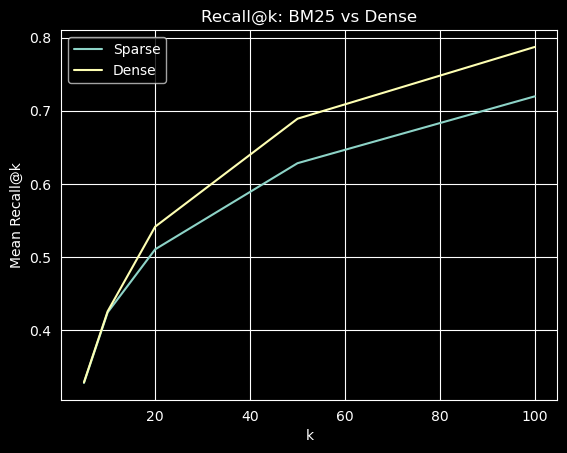

In [24]:
# Recall@k Comp

plt.plot(k_values, bm25_recalls, label='Sparse')
plt.plot(k_values, dense_recalls, label='Dense')
plt.xlabel('k')
plt.ylabel('Mean Recall@k')
plt.title('Recall@k: BM25 vs Dense')
plt.legend()
plt.savefig('recall_comparison.png')
plt.show()


In [41]:
headers = ["k", "BM25", "Dense", "Delta"]

rows = [
    [k, f"{bm25_r:.1%}", f"{dense_r:.1%}", f"{dense_r - bm25_r:.1%}"]
    for k, bm25_r, dense_r in zip(k_values, bm25_recalls, dense_recalls)
]

print(tabulate(rows, headers=headers, tablefmt="simple"))

  k  BM25    Dense    Delta
---  ------  -------  -------
  5  32.8%   32.9%    0.1%
 10  42.4%   42.6%    0.1%
 20  51.1%   54.1%    3.1%
 50  62.8%   68.9%    6.1%
100  72.0%   78.7%    6.8%


In [54]:
# MRR Comp

print(f"MRR-Sparse: {results_a1['mrr']:.2f}")
print(f"MRR-Dense: {results_a2['mrr']:.2f}")
print()
print(f"MRR-DIFF: {(results_a2['mrr'] - results_a1['mrr']):.2f}")

MRR-Sparse: 0.38
MRR-Dense: 0.40

MRR-DIFF: 0.03
